In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_excel('HR.xlsx')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df.shape

(14999, 10)

In [10]:
# Information about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
##Column Name	Description :

#satisfaction_level : 	    satisfaction level at the job of an employee
#last_evaluation    :    	Rating   between 0 to 1, received by an employee at his last evaluation
#number_project     : 	    Number of projects, an employee involved in
#average_montly_hours:	Average number of hours in a month, spent by an employee at office
#time_spend_company	:   Number of years spent in the company
#Work_accident	    :   0 - no accident during employee stay, 1 - accident during employee stay
#left	            :   0 indicates employee stays in the company, 1 indicates - employee left the company
#promotion_last_5years: 	Number of promotions in his stay
#Department          : 	Department, an employee belongs to
#salary	            :   Salary in USD

In [12]:
# Check the null values

df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [14]:
df['number_project'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

In [15]:
df['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [16]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [21]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [19]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [23]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [24]:
df['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64


## EDA : Exploratory Data Analysis

In [25]:
# 1. Data Visualization

In [29]:
df.corr().round(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.0000,0.1050,-0.1430,-0.0200,-0.1009,0.0587,-0.3884,0.0256
last_evaluation,0.1050,1.0000,0.3493,0.3397,0.1316,-0.0071,0.0066,-0.0087
number_project,-0.1430,0.3493,1.0000,0.4172,0.1968,-0.0047,0.0238,-0.0061
average_montly_hours,-0.0200,0.3397,0.4172,1.0000,0.1278,-0.0101,0.0713,-0.0035
time_spend_company,-0.1009,0.1316,0.1968,0.1278,1.0000,0.0021,0.1448,0.0674
Work_accident,0.0587,-0.0071,-0.0047,-0.0101,0.0021,1.0000,-0.1546,0.0392
left,-0.3884,0.0066,0.0238,0.0713,0.1448,-0.1546,1.0000,-0.0618
promotion_last_5years,0.0256,-0.0087,-0.0061,-0.0035,0.0674,0.0392,-0.0618,1.0000


<AxesSubplot:>

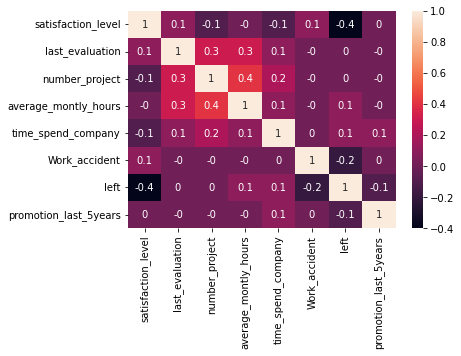

In [32]:
# Plot Heatmap

sns.heatmap(df.corr().round(1), annot=True)

In [33]:
# 2.2 Draw Distribution Plot :    ■    Employee Satisfaction    ■    Employee Evaluation 

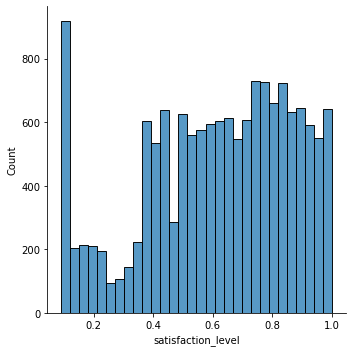

In [34]:
# Employee Satisfaction

sns.displot(df['satisfaction_level'])

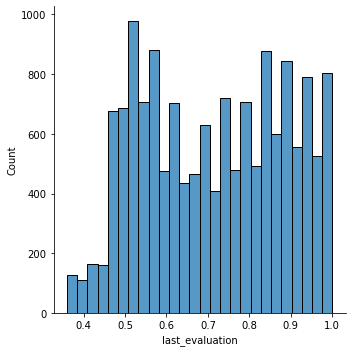

In [36]:
# Employee Evaluation

sns.displot(df['last_evaluation'])
plt.show()

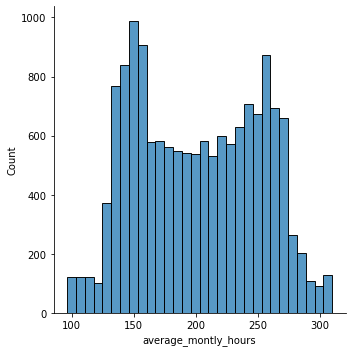

In [37]:
sns.displot(df['average_montly_hours'])
plt.show()

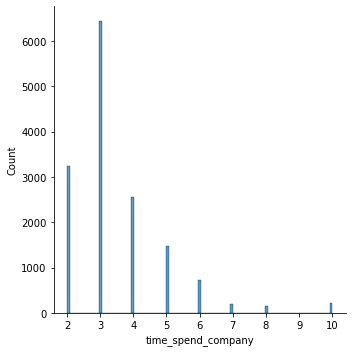

In [38]:
sns.displot(df['time_spend_company'])
plt.show()

In [43]:
# Dept wise total left/ stay

df.groupby(['sales'])['left'].value_counts().unstack()

left,0,1
sales,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


<AxesSubplot:xlabel='sales'>

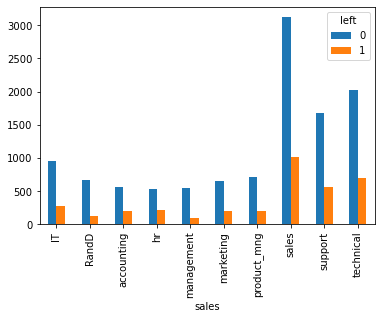

In [49]:
df.groupby(['sales'])['left'].value_counts().unstack().plot.bar()

<AxesSubplot:xlabel='number_project'>

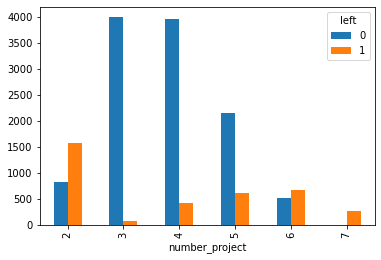

In [50]:
# No of projects and stay/left

df.groupby(['number_project'])['left'].value_counts().unstack().plot.bar()

<AxesSubplot:xlabel='salary'>

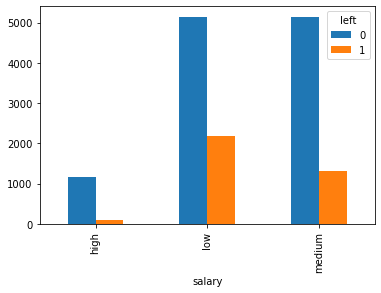

In [51]:
# salary wise stay/leave

df.groupby(['salary'])['left'].value_counts().unstack().plot.bar()

### Perform clustering of Employees who left based on their satisfaction and evaluation 

In [53]:
dfclus = df[['satisfaction_level', 'last_evaluation','left' ]]
dfclus

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
...,...,...,...
14994,0.40,0.57,1
14995,0.37,0.48,1
14996,0.37,0.53,1
14997,0.11,0.96,1


In [54]:
dfclus.sample()

,satisfaction_level,last_evaluation,left
11002,0.13,0.5,0


In [55]:
# PREPROCESSING

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [58]:
df_num=df.select_dtypes(include=['int64','float64'])
df_cat=df.select_dtypes(include='object')

In [64]:
df_cat= pd.get_dummies(df_cat)
df_cat

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0,0,1,0


In [67]:
df_cat = pd.get_dummies(data = df_cat)

In [68]:
df_cat

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0,0,1,0


In [69]:
final_df=pd.concat([df_num, df_cat], axis=1)

In [70]:
final_df.shape

(14999, 21)

In [71]:
df.shape

(14999, 10)

In [72]:
# SPLITTING THE DATA FOR TRAINING MODEL

In [74]:
X = final_df.drop('left',axis=1)
y=df['left']

In [76]:
X.shape

(14999, 20)

In [77]:
y.shape

(14999,)

In [79]:
from sklearn.model_selection import train_test_split

Xtrain,  Xtest,ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state= 1)

In [88]:
print(Xtrain.shape)
print(Xtest.shape)

(11999, 20)
(3000, 20)


In [ ]:
# Data is highly imbalanced (3:1) for training dataset since the records of 'left' are very low as compared to records of 'stay'.

# Using SMOTE Technique we will handle data imbalance.

In [95]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
Xtrain1,ytrain1=sm.fit_resample(Xtrain,ytrain)

In [98]:
ytrain1.value_counts()

0    9141
1    9141
Name: left, dtype: int64

In [102]:
from sklearn.model_selection import cross_val_score

In [105]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=5000)
lr.fit(Xtrain1,ytrain1)

LogisticRegression(max_iter=5000)

In [112]:
ypred=lr.predict(Xtest)

In [108]:
print(lr.score(Xtrain1,ytrain1))
print(lr.score(Xtest,ytest))

0.8046165627393064
0.7786666666666666


In [119]:
# CHECKING ACCURACY/ PERFORMANCE OF MODEL

In [114]:
import sklearn.metrics as mat

In [117]:
mat.confusion_matrix(ypred,ytest)

array([[1825,  202],
       [ 462,  511]], dtype=int64)

In [118]:
print(mat.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      2287
           1       0.53      0.72      0.61       713

    accuracy                           0.78      3000
   macro avg       0.71      0.76      0.73      3000
weighted avg       0.81      0.78      0.79      3000



In [120]:
mat.accuracy_score(ytest,ypred)

0.7786666666666666

In [121]:
# RANDOM FOREST CLASSIFIER

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rf=RandomForestClassifier(max_depth=5)
rf.fit(Xtrain1,ytrain1)

RandomForestClassifier(max_depth=5)

In [126]:
ypred=rf.predict(Xtest)

In [129]:
print(rf.score(Xtrain1,ytrain1))
print(rf.score(Xtest,ytest))

0.9520840170659666
0.9613333333333334


In [130]:
mat.confusion_matrix(ypred,ytest)

array([[2229,   58],
       [  58,  655]], dtype=int64)

In [131]:
print(mat.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2287
           1       0.92      0.92      0.92       713

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000



In [132]:
mat.accuracy_score(ypred,ytest)

0.9613333333333334

In [135]:
from sklearn.neighbors import KNeighborsClassifier

In [145]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(Xtrain1,ytrain1)

KNeighborsClassifier(n_neighbors=4)

In [146]:
print(knn.score(Xtrain1,ytrain1))
print(knn.score(Xtest,ytest))

0.9735805710534953
0.9243333333333333


In [147]:
ypred=knn.predict(Xtest)

In [148]:
mat.accuracy_score(ypred,ytest)

0.9243333333333333

In [149]:
# RANDOM FOREST CLASSIFIER work well than LOGISTIC REGRESSSION 
# on given dataset